In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
import datetime as dt
from itertools import combinations
from collections import Counter

In [2]:
path = '/content/data'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [3]:
# getting to know the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
# checking the nulls
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
# Removing all rows containing a NaN  value
df.dropna(inplace=True)

### Question 1
what is the best month in sales? and how much was the revenue?

In [6]:
# finding the or
df = df[df['Order Date'].str[0:2] != 'Or']

In [7]:
# adding a month column
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

In [8]:
# adding a sales column
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Price Each'] * df['Quantity Ordered']

In [9]:
# now everything is ready so let's answer the first question
rev = df.groupby('Month').sum()

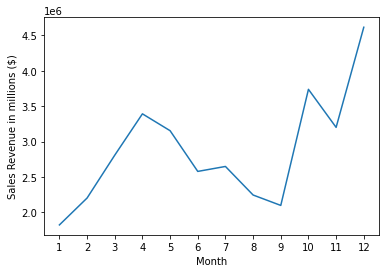

In [10]:
fig, ax = plt.subplots()
months = range(1,13)
plt.xlabel("Month")
plt.ylabel("Sales Revenue in millions ($)")
plt.xticks(months)
ax.plot(months,rev['Sales'] )

**So, the month that had highest sales is December**

> Probably because of Christmas

**Also, the worst month was January** 

> probably because people spent all their savings on December


### Question 2
What City had the highest number of sales?

In [11]:
# adding a city column

def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")
df['State'] = df['Purchase Address'].apply(lambda x: get_state(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta GA,GA
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle WA,WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta GA,GA
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta GA,GA
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle WA,WA


In [12]:
# answering the second question
city = df.groupby(['City']).sum()
city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


<BarContainer object of 10 artists>

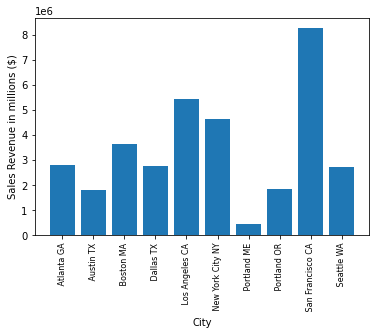

In [13]:
cities = [city for city, df in df.groupby('City')]
plt.xlabel("City")
plt.ylabel("Sales Revenue in millions ($)")
plt.xticks(rotation='vertical', size=8)
plt.bar(cities, city['Sales'])

**So back to our question, the city with most sales is San Francisco CA**

> might be because of the silicon vally or better tech ads there or even people have more money there, needs some more digging to find out

**Also, the worst city in terms of sales is Portland ME** 

> probably Portland maine is the smallest city out of these, or maybe people there are not that "rich"


### Question 3
what is the peak time for purchasing?

In [14]:
# converting the order date to datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [15]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta GA,GA,16,51
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle WA,WA,8,55
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta GA,GA,12,41
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta GA,GA,10,15
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle WA,WA,2,13


In [16]:
# answering the third question
df['Count'] = 1
hour = df.groupby(['Hour']).count()['Count']
hours = [hour for hour, df in df.groupby('Hour')]

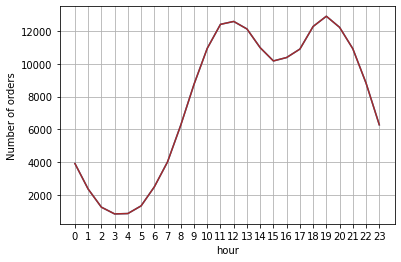

In [17]:
plt.plot(hours, hour)
plt.xlabel("hour")
plt.ylabel("Number of orders")
plt.xticks(hours)
plt.plot(hours, hour, color="brown")
plt.grid()

**As we can see here, peak time was on 12 and 19**


### Question 4
what products are most often sold together?

In [18]:
df = df[df['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [19]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head(5)

,Order ID,Grouped
118,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,"Vareebadd Phone,USB-C Charging Cable"
188,223095,"Apple Airpods Headphones,AA Batteries (4-pack)"
201,223106,"Wired Headphones,Vareebadd Phone"
213,223117,"Google Phone,USB-C Charging Cable"


In [20]:
count = Counter()
for row in df['Grouped']:
  row_list = row.split(' ')
  count.update(Counter(combinations(row_list, 2)))
for key,value in count.most_common(10):
    print(key, value)

('Charging', 'Cable') 6107
('Phone,USB-C', 'Charging') 2889
('Phone,USB-C', 'Cable') 2346
('iPhone,Lightning', 'Charging') 2147
('Google', 'Charging') 2142
('Google', 'Phone,USB-C') 2106
('Batteries', '(4-pack)') 1936
('iPhone,Lightning', 'Cable') 1783
('Google', 'Cable') 1748
('Airpods', 'Headphones') 1543


**As you can see the most sold products together are above**

### Question 5
what product sold the most? and why?

Text(0, 0.5, 'Quantity Ordered')

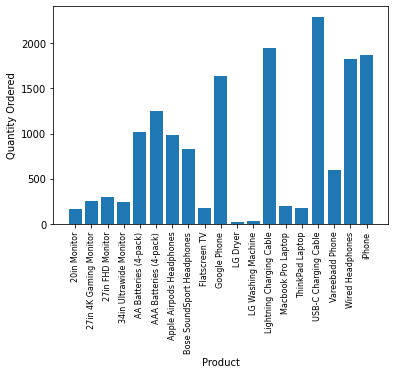

In [21]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")

In [22]:
prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

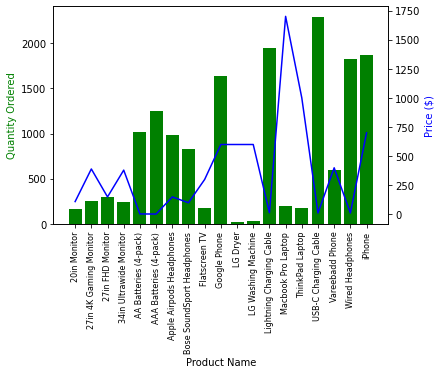

In [23]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

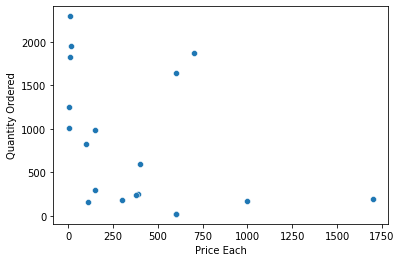

In [24]:
sns.scatterplot( x=prices, y=quantity_ordered)

**So, there is an inverse relationship between the price and quantity ordered**